# In this project, we will perform basic text preprocessing using the TensorFlow tokenizer. The resultant text data will serve as the input for training a deep learning model that includes an embedding layer in its input.


In [ ]:
import pandas as pd
import tensorflow as tf

## Read the dataset

In [479]:
data = pd.read_csv('sarcasm_detection.csv')

In [480]:
data.head(10)

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1
5,uid_29449,Orange is the New Black House of Cards Hemlock...,2014-02,0,What internet-only shows do you watch that are...,2,2,cordcutters,zgggg,0
6,uid_528005,Pff everybody knows science is sexist.,2015-08,0,Interesting... it's almost like there is a phy...,8,8,news,needconfirmation,1
7,uid_850110,because he called out r/mma's golden boy sage ...,2016-12,-1,How come Mickey Gall did not get more credit f...,1,-1,MMA,young_Handsome_MF,1
8,uid_840172,What if he's not into dudes though?,2015-12,0,stop making memes and take your fat asses to t...,1,1,AdviceAnimals,Kauzrae,1
9,uid_288113,probably should've followed your original comm...,2015-09,0,Lol I've been downvoted. What is sarcasm,11,11,trees,joshj2398,1


## Create a copy of the dataset

In [481]:
df = data.copy()

### Remove unwanted columns

In [482]:
df.drop(['ID', 'date', 'down', 'score', 'top', 'user'], axis=1, inplace=True)

In [483]:
df.head(10)

,comment,parent_comment,topic,label
0,"Well, let's be honest here, they don't actuall...",They should shut the fuck up and let the commu...,starcitizen,0
1,"Well, I didn't need evidence to believe in com...",You need evidence to kill people? I thought we...,EnoughCommieSpam,1
2,"Who does an ""official promo"" in 360p?",2014 BMW S1000R: Official Promo,motorcycles,0
3,Grotto koth was the best,Not really that memorable lol if you want memo...,hcfactions,1
4,Neal's back baby,James Neal hit on Zach Parise,hockey,1
5,Orange is the New Black House of Cards Hemlock...,What internet-only shows do you watch that are...,cordcutters,0
6,Pff everybody knows science is sexist.,Interesting... it's almost like there is a phy...,news,1
7,because he called out r/mma's golden boy sage ...,How come Mickey Gall did not get more credit f...,MMA,1
8,What if he's not into dudes though?,stop making memes and take your fat asses to t...,AdviceAnimals,1
9,probably should've followed your original comm...,Lol I've been downvoted. What is sarcasm,trees,1


In [484]:
df.label.value_counts()

1    7527
0    7473
Name: label, dtype: int64

##  Using keras tokenizer for breaking down the documents to create a vocabulary

In [485]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [486]:
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(df.comment)
word_index = tokenizer.word_index

In [487]:
len(word_index)

17786

##  Pad the sequences

In [488]:
sequences = tokenizer.texts_to_sequences(df.comment)
padded = pad_sequences(sequences, padding='post')

In [489]:
padded.shape

(15000, 134)

In [490]:
print(padded[0])

[  49  384   16 1369  118   18   38  138  516    3   47   94 7584   21
   18   19    3  794   64   82  218  130    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [491]:
vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
# training_size = 20000

##  Test train split:

In [492]:
from sklearn.model_selection import train_test_split

In [493]:
X = df.drop(columns=['label', 'parent_comment', 'topic'])
y = df.label

In [494]:
y

0        0
1        1
2        0
3        1
4        1
        ..
14995    0
14996    0
14997    0
14998    1
14999    1
Name: label, Length: 15000, dtype: int64

In [495]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [496]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((12000, 1), (3000, 1), (12000,), (3000,))

In [497]:
train_x.comment.shape

(12000,)

In [498]:
training_sentences = train_x.comment
testing_sentences = test_x.comment

In [499]:
training_labels = train_y
testing_labels = test_y

## Create vocabulary and pad sequences

In [500]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [501]:
import numpy as np
training_padded = np.array(training_padded)
training_labels =np.expand_dims(training_labels, axis=1)
testing_padded = np.array(testing_padded)
testing_labels = np.expand_dims(testing_labels, axis=1)

In [502]:
training_labels.shape

(12000, 1)

In [503]:
training_padded.shape

(12000, 120)

In [504]:
testing_labels.shape

(3000, 1)

In [505]:
testing_padded.shape

(3000, 120)

## Train the model 

In [506]:
import tensorflow_addons as tfa

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tfa.metrics.F1Score(num_classes=1, average='macro')])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [507]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 120, 32)           320000    
                                                                 
 global_average_pooling1d_18  (None, 32)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_36 (Dense)            (None, 24)                792       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_37 (Dense)            (None, 12)                300       
                                                                 
 dense_38 (Dense)            (None, 1)                 13        
                                                     

In [508]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30


2022-09-23 00:23:14.366856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-23 00:23:21.567657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 - 8s - loss: 0.6932 - f1_score: 0.6650 - val_loss: 0.6921 - val_f1_score: 0.6810 - 8s/epoch - 21ms/step
Epoch 2/30
375/375 - 6s - loss: 0.6835 - f1_score: 0.6650 - val_loss: 0.6679 - val_f1_score: 0.6810 - 6s/epoch - 17ms/step
Epoch 3/30
375/375 - 6s - loss: 0.6094 - f1_score: 0.6650 - val_loss: 0.6352 - val_f1_score: 0.6810 - 6s/epoch - 17ms/step
Epoch 4/30
375/375 - 6s - loss: 0.5295 - f1_score: 0.6650 - val_loss: 0.6528 - val_f1_score: 0.6810 - 6s/epoch - 17ms/step
Epoch 5/30
375/375 - 6s - loss: 0.4667 - f1_score: 0.6650 - val_loss: 0.7220 - val_f1_score: 0.6810 - 6s/epoch - 16ms/step
Epoch 6/30
375/375 - 6s - loss: 0.4239 - f1_score: 0.6650 - val_loss: 0.7532 - val_f1_score: 0.6810 - 6s/epoch - 16ms/step
Epoch 7/30
375/375 - 6s - loss: 0.3830 - f1_score: 0.6650 - val_loss: 0.7915 - val_f1_score: 0.6810 - 6s/epoch - 16ms/step
Epoch 8/30
375/375 - 6s - loss: 0.3635 - f1_score: 0.6651 - val_loss: 0.8305 - val_f1_score: 0.6810 - 6s/epoch - 16ms/step
Epoch 9/30
375/375 - 6s - l

## Plot the f1-scores and loss for each epoch

In [514]:
history.history.keys()

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])

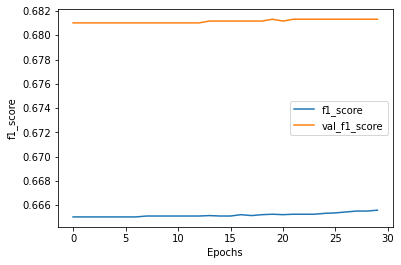

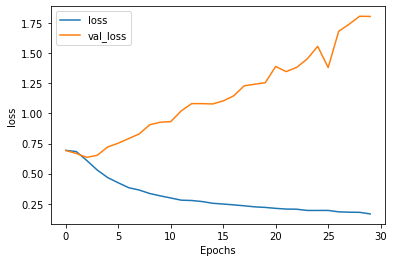

In [515]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "f1_score")
plot_graphs(history, "loss")

In [516]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(training_labels[2])

you can sleep soundly if russell martin and a shovel are guarding your house or is it the other way around ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Who does an "official promo" in 360p?
[0]


In [517]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


## Predict few example sentences

In [518]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 15ms/step
[[0.9998615 ]
 [0.04766525]]


## Conclusion

By using basic text preprocessing, with the help of tensorflow tokenizer, we cleaned the documents. The processed text data is used to train a deep learning model having an embedding layer in the input.

Obtained cross validation f1-score: 0.68